<h1>Rain in Australia</h1>
    
<h2>Description</h2>


This dataset contains daily weather observations from numerous Australian weather stations.    




<h2>Features description</h2>

    Date---The date of observation
    
    Location---The common name of the location of the weather station
    
    MinTemp---The minimum temperature in degrees celsius
    
    MaxTemp---The maximum temperature in degrees celsius
    
    Rainfall---The amount of rainfall recorded for the day in mm
    
    Evaporation---The so-called Class A pan evaporation (mm) in the 24 hours to 9am
    
    Sunshine---The number of hours of bright sunshine in the day.
    
    WindGustDir---The direction of the strongest wind gust in the 24 hours to midnight
    
    WindGustSpeed---The speed (km/h) of the strongest wind gust in the 24 hours to midnight
    
    WindDir9am---Direction of the wind at 9am
    
    WindDir3pm---Direction of the wind at 3pm
    
    WindSpeed9am---Wind speed (km/hr) averaged over 10 minutes prior to 9am
    
    WindSpeed3pm---Wind speed (km/hr) averaged over 10 minutes prior to 3pm
    
    Humidity9am---Humidity (percent) at 9am
    
    Humidity3pm---Humidity (percent) at 3pm
    
    Pressure9am---Atmospheric pressure (hpa) reduced to mean sea level at 9am
    
    Pressure3pm---Atmospheric pressure (hpa) reduced to mean sea level at 3pm
    
    Cloud9am---Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of                    eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates                    completely clear sky whilst an 8 indicates that it is completely overcast.
    
    Cloud3pm---Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description                of the values
    
    Temp9am---Temperature (degrees C) at 9am
    
    
    Temp3pm---Temperature (degrees C) at 3pm

    RainToday---Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

    RISK_MM---The amount of next day rain in mm. Used to create response variable RainTomorrow. A kind of  measure of the "risk".
    
    
    RainTomorrow---The target variable. Did it rain tomorrow?


<h2>References</h2>
This total dataset is taken from following reference. 

https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

<h2>Source & Acknowledgements</h2>

Observations were drawn from numerous weather stations. The daily observations are available from http://www.bom.gov.au/climate/data. Copyright Commonwealth of Australia 2010, Bureau of Meteorology.

Definitions adapted from http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml

This dataset is also available via the R package rattle.data and at https://rattle.togaware.com/weatherAUS.csv. Package home page: http://rattle.togaware.com. Data source: http://www.bom.gov.au/climate/dwo/ and http://www.bom.gov.au/climate/data.

And to see some great examples of how to use this data: https://togaware.com/onepager/

<h2>Objective</h2>

Predict whether or not it will rain tomorrow by training a binary classification model on target RainTomorrow.

The target variable RainTomorrow means: Did it rain the next day? Yes or No.

In [1]:
#For Data loading and preprocessing
import pandas as pd

#For matrix operations
import numpy as np

#For plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#For splitting the data
from sklearn.model_selection import train_test_split

#For data preprocessing
from sklearn.preprocessing import StandardScaler

#For hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
#For appling LogisticRegression
from sklearn.linear_model import LogisticRegression

#For model/vatiable persistence 
from sklearn.externals import joblib

#For math operations
import math 

#To see the progress of the iterations
#from tqdm import tqdm

#Performance metrices
from sklearn.metrics import roc_auc_score,roc_curve,auc,log_loss,confusion_matrix

#For encoding the features
from sklearn.preprocessing import LabelEncoder,LabelBinarizer

#For ignoring warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('weatherAUS.csv')

print("Total no.of points = {}".format(data.shape[0]))
data.head(5)

Total no.of points = 142193


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


<h2>1. Exploratory Data Analysis</h2> 

In [3]:
data.drop_duplicates(inplace=True)

In [4]:
data.isnull().any()

Date             False
Location         False
MinTemp           True
MaxTemp           True
Rainfall          True
Evaporation       True
Sunshine          True
WindGustDir       True
WindGustSpeed     True
WindDir9am        True
WindDir3pm        True
WindSpeed9am      True
WindSpeed3pm      True
Humidity9am       True
Humidity3pm       True
Pressure9am       True
Pressure3pm       True
Cloud9am          True
Cloud3pm          True
Temp9am           True
Temp3pm           True
RainToday         True
RISK_MM          False
RainTomorrow     False
dtype: bool

##### We can see there are many Null values in the data , lets try to fill  with proper values

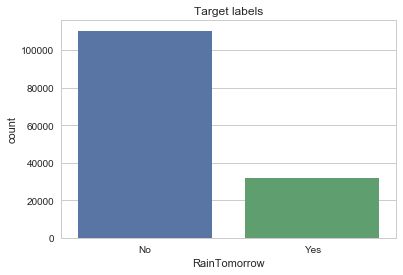

In [5]:
sns.set(style="whitegrid")
sns.countplot(data.RainTomorrow)
plt.title("Target labels")
plt.show()


##### From above plot it is clear that data set is imbalanced 

In [6]:
#Separating the data based on its class label.
data_yes = data[data['RainTomorrow']=='Yes']
data_no = data[data['RainTomorrow']=='No']

##### Now lets observe the most occuring values in every  column for both the cases 

In [7]:
#Observing the mode for all columns when RainTomorrow = Yes  
mode_values_for_yes = data_yes.mode()
mode_values_for_yes

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2010-09-03,Portland,9.6,17.2,0.0,4.0,0.0,W,39.0,N,...,69.0,1014.0,1010.4,8.0,8.0,13.8,16.0,No,1.2,Yes


In [8]:
#Observing the mode for all columns when RainTomorrow = No  
mode_values_for_no = data_no.mode()
mode_values_for_no

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2014-03-18,Canberra,11.0,20.0,0.0,4.0,11.0,E,35.0,N,...,52.0,1017.9,1015.5,1.0,1.0,16.0,20.0,No,0.0,No


In [9]:
data_no['MaxTemp'].median()

23.3

In [10]:
#For Temparatures we cannot replace NaN values with 0, hence replacing NaN with its respective mode value
data_yes['MinTemp'].fillna(value=data_yes['MinTemp'].mode()[0],inplace=True )
data_no['MinTemp'].fillna(value=data_no['MinTemp'].mode()[0],inplace=True )

data_yes['MaxTemp'].fillna(value=data_yes['MaxTemp'].mode()[0],inplace=True )
data_no['MaxTemp'].fillna(value=data_no['MaxTemp'].mode()[0],inplace=True )


data_yes['Temp9am'].fillna(value=data_yes['Temp9am'].mode()[0],inplace=True )
data_no['Temp9am'].fillna(value=data_no['Temp9am'].mode()[0],inplace=True )

data_yes['Temp3pm'].fillna(value=data_yes['Temp3pm'].mode()[0],inplace=True )
data_no['Temp3pm'].fillna(value=data_no['Temp3pm'].mode()[0],inplace=True )


# For humidity also 
data_yes['Humidity9am'].fillna(value=data_yes['Humidity9am'].mode()[0],inplace=True )
data_no['Humidity9am'].fillna(value=data_no['Humidity9am'].mode()[0],inplace=True )



data_yes['Humidity3pm'].fillna(value=data_yes['Humidity3pm'].mode()[0],inplace=True )
data_no['Humidity3pm'].fillna(value=data_no['Humidity3pm'].mode()[0],inplace=True )

# For the rain fall feature we can replace NaN with 0.0 which says there is no rain fall
data_yes['Rainfall'].fillna(value=0.0,inplace=True)
data_no['Rainfall'].fillna(value=0.0,inplace=True)


data_yes['Pressure9am'].fillna(value=data_yes['Pressure9am'].median(),inplace=True )
data_no['Pressure9am'].fillna(value=data_no['Pressure9am'].median(),inplace=True )

data_yes['Pressure3pm'].fillna(value=data_yes['Pressure3pm'].median(),inplace=True )
data_no['Pressure3pm'].fillna(value=data_no['Pressure3pm'].median(),inplace=True )


data_yes['WindSpeed9am'].fillna(value=data_yes['WindSpeed9am'].median(),inplace=True )
data_no['WindSpeed9am'].fillna(value=data_no['WindSpeed9am'].median(),inplace=True )

data_yes['WindSpeed3pm'].fillna(value=data_yes['WindSpeed3pm'].median(),inplace=True )
data_no['WindSpeed3pm'].fillna(value=data_no['WindSpeed3pm'].median(),inplace=True )

#WindGustSpeed -- replacing with median
data_yes['WindGustSpeed'].fillna(value=data_yes['WindGustSpeed'].median(),inplace=True)
data_no['WindGustSpeed'].fillna(value=data_no['WindGustSpeed'].median(),inplace=True)







In [11]:
# For RainToday feature we cannot fill any value, so better to remove the NaN values 
data_yes.dropna(inplace=True)
data_no.dropna(inplace=True)

In [12]:
data_filled= data_yes.append(data_no, ignore_index=True)

In [13]:
data_filled.isnull().any()

Date             False
Location         False
MinTemp          False
MaxTemp          False
Rainfall         False
Evaporation      False
Sunshine         False
WindGustDir      False
WindGustSpeed    False
WindDir9am       False
WindDir3pm       False
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Cloud9am         False
Cloud3pm         False
Temp9am          False
Temp3pm          False
RainToday        False
RISK_MM          False
RainTomorrow     False
dtype: bool

In [14]:
print("Percentage of removed points= {}%".format(100.00-(len(data_filled)*100/len(data))))

Percentage of removed points= 60.14642070988023%


In [15]:
# sorting the data based on data (Time based splitting)
data_filled=data_filled.sort_values(by='Date')

In [16]:
#Removing unwanted features, RISK_MM is same as target label hence removing with data and loaction  
data_final = data_filled.drop(['Date', 'Location','RISK_MM'], axis=1)

In [17]:
data_final.shape

(56669, 21)

###### Now lets check for any outliers 

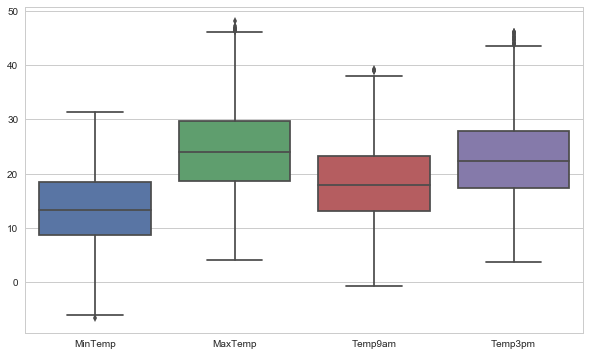

In [18]:
#Outliers we are checking only for numerical features
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_final[['MinTemp','MaxTemp','Temp9am','Temp3pm']])

#### From the above box plot we can see that all temparature values are meaning full. no outliers found here

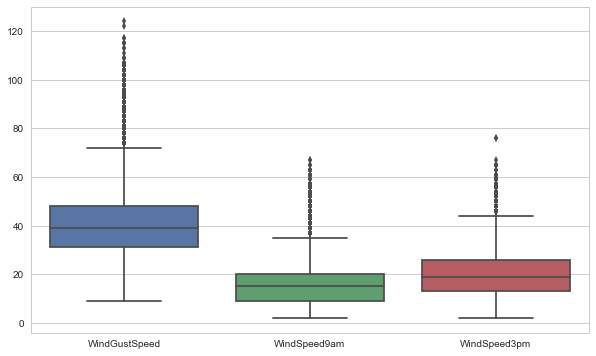

In [19]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_final[['WindGustSpeed','WindSpeed9am','WindSpeed3pm']])

##### All wind speed values also are in sensible ranges

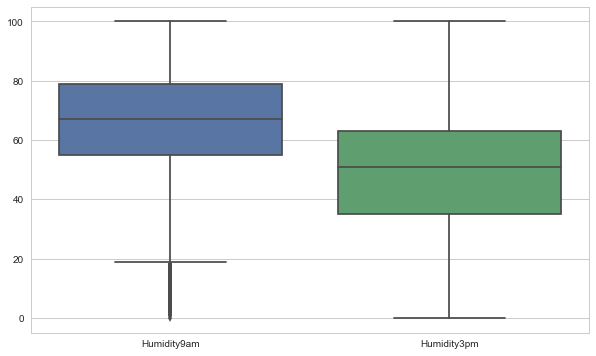

In [20]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_final[['Humidity9am','Humidity3pm']])

##### As we can see that there are some humidity values =0% which is almost never possible, hence removing 0 values 

In [21]:
data_final= data_final[data_final['Humidity3pm']!=0.0]
data_final= data_final[data_final['Humidity9am']!=0.0]

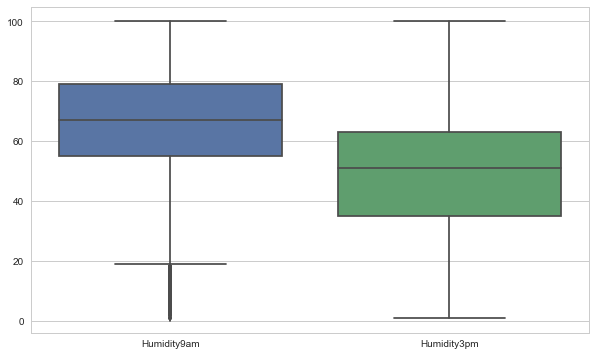

In [22]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_final[['Humidity9am','Humidity3pm']])

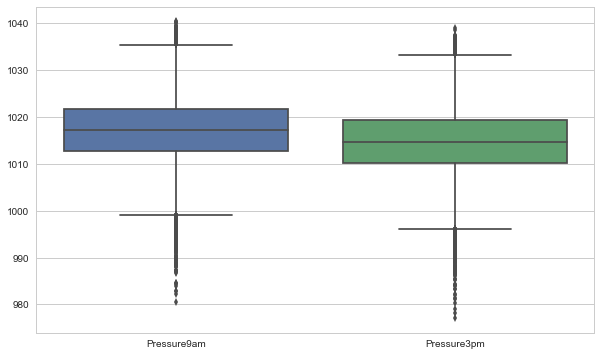

In [23]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_final[['Pressure9am','Pressure3pm']])

##### Here also there are no outliers, all pressure ranges also normally can happen in nature 

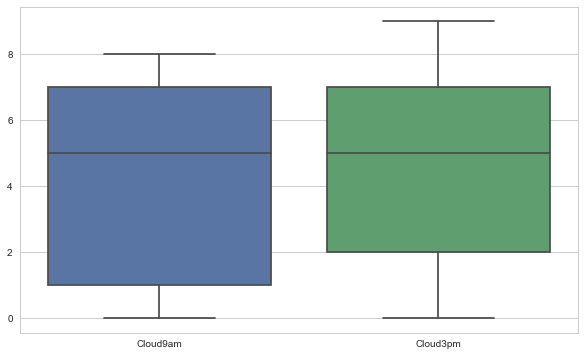

In [24]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_final[['Cloud9am','Cloud3pm']])

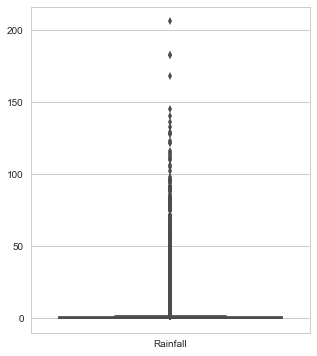

In [25]:
sns.set(style="whitegrid")
plt.figure(figsize=(5, 6))
sns.boxplot(data=data_final[['Rainfall']])

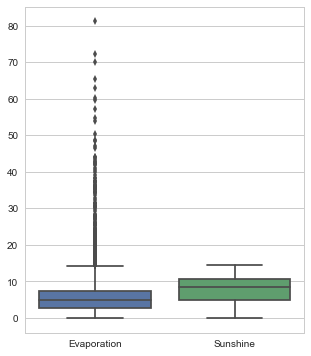

In [26]:
sns.set(style="whitegrid")
plt.figure(figsize=(5, 6))
sns.boxplot(data=data_final[['Evaporation','Sunshine']])

##### Hence  the data is not suffering from outliers

<h2>2. Data pre-processing and Feature engineering</h2>

From the EDA we observed that there are few categorical variables they are :

WindGustDir

RainToday

WindDir9am

WindDir3pm

and 
class label = RainTomorrow

so encoding all these features into values 

In [27]:
WindGustDir_encode = LabelEncoder()
data_final['WindGustDir']=WindGustDir_encode.fit_transform(data_final['WindGustDir'])

WindDir9am_encode = LabelEncoder()
data_final['WindDir9am']=WindDir9am_encode.fit_transform(data_final['WindDir9am'])

WindDir3pm_encode = LabelEncoder()
data_final['WindDir3pm']=WindDir3pm_encode.fit_transform(data_final['WindDir3pm'])

RainToday_encode = LabelEncoder()
data_final['RainToday']=RainToday_encode.fit_transform(data_final['RainToday'])

RainTomorrow_encode = LabelEncoder()
data_final['RainTomorrow']=RainTomorrow_encode.fit_transform(data_final["RainTomorrow"])

In [28]:
Y= data_final['RainTomorrow']
X = data_final.drop(['RainTomorrow'],axis=1)

In [29]:
column_names=X.columns.tolist()

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.80,shuffle=False)

##### Since the features are measured from different scales, appling featruring scaling  

In [31]:
scaler= StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
def plotErrors(k,train,cv):
       
    plt.plot(k, train, label='Train logloss')
    plt.plot(k, cv, label='CV logloss')
    plt.legend()
    plt.xlabel("log(C)= -log(λ)")
    plt.ylabel("Neg_Log Loss")
    plt.title("Error Plot for Train and Validation data")
    plt.grid()
    plt.show()

<h2> 3. Modeling the data using Logisitic Regression</h2>

<h3> Hyper-parameter tuning</h3>

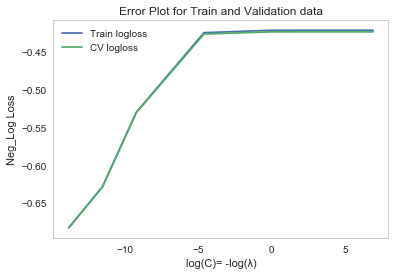

In [35]:
parameters={'C':[10**-6,10**-5,10**-4, 10**-2, 10**0, 10**2, 10**3] }
log_c = list(map(lambda x : float(math.log(x)),parameters['C']))

clf_log = LogisticRegression(penalty='l2',class_weight='balanced')

clf = GridSearchCV(clf_log, parameters, cv=5, scoring='neg_log_loss',return_train_score =True)
clf.fit(X_train, y_train)

train_loss= clf.cv_results_['mean_train_score']
cv_loss = clf.cv_results_['mean_test_score'] 

plotErrors(k=log_c,train=train_loss,cv=cv_loss)

In [36]:
clf = clf.best_estimator_
clf

LogisticRegression(C=1000, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [37]:
#Trainig with the best value of C
clf.fit(X_train, y_train)

LogisticRegression(C=1000, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

<h3>Model Evaluating</h3>

In [38]:
#Printing the log-loss for both trian and test data
train_loss = log_loss(y_train, clf.predict_proba(X_train)[:,1])
test_loss  =log_loss(y_test, clf.predict_proba(X_test)[:,1])


print("Log_loss on train data is :{}".format(train_loss))
print("Log_loss on test data is :{}".format(test_loss))

Log_loss on train data is :0.4213743265965361
Log_loss on test data is :0.42842652530959185


##### Since log-loss can have any value between [0, ∞] so we can only interpret the model prefectly fitted or not but   we cannot tell how best the model is, hence checking with AUC metric 

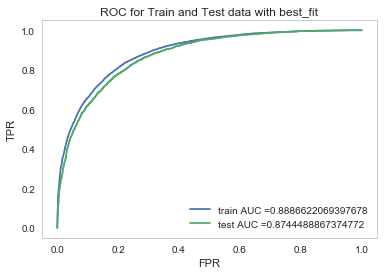

In [39]:
#Plotting AUC 
train_fpr, train_tpr, thresholds = roc_curve(y_train, clf.predict_proba(X_train)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC for Train and Test data with best_fit")
plt.grid()
plt.show()

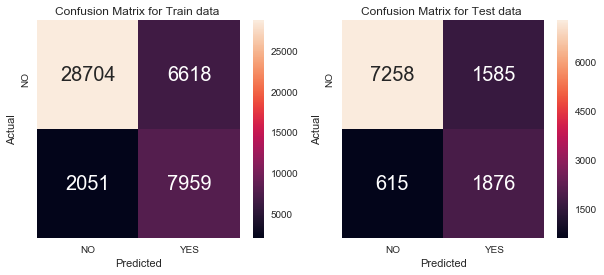

In [40]:
#ploting Confusion matrix
#Ref:https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels/48018785
def plotcm (cm,ax,title):
    sns.heatmap(cm, ax=ax,annot=True,fmt='d',annot_kws={'size':20},yticklabels=3);
    ax.set_xlabel('Predicted');
    ax.set_ylabel('Actual'); 
    ax.set_title('Confusion Matrix for {} '.format(title)); 
    ax.xaxis.set_ticklabels(['NO', 'YES']); 
    ax.yaxis.set_ticklabels(['NO', 'YES']);


fig, subplt = plt.subplots(1, 2,figsize=(10, 4)) 
cm=confusion_matrix(y_train, clf.predict(X_train))
ax= subplt[0]
plotcm(cm,ax,'Train data')

cm=confusion_matrix(y_test, clf.predict(X_test))
ax= subplt[1]
plotcm(cm,ax,'Test data')

<h3> Feature interpretation</h3>

In [41]:
clf.coef_[0]

array([-0.27323143, -0.02141824,  0.10994747, -0.06853409, -0.62721434,
        0.12271816,  0.85054113, -0.0318672 , -0.03485931, -0.09530709,
       -0.24165585,  0.06371587,  1.13844823,  1.00665528, -1.42428327,
       -0.09042131,  0.30186218,  0.2647275 ,  0.13053517,  0.17729874])

In [42]:
feature_weights=sorted(zip(clf.coef_[0],column_names),reverse = True)

In [43]:
feature_weights

[(1.1384482301413, 'Humidity3pm'),
 (1.0066552763622452, 'Pressure9am'),
 (0.8505411317523849, 'WindGustSpeed'),
 (0.30186217790397973, 'Cloud3pm'),
 (0.26472749783217453, 'Temp9am'),
 (0.17729874034043772, 'RainToday'),
 (0.130535165126773, 'Temp3pm'),
 (0.12271816167719675, 'WindGustDir'),
 (0.10994746540819095, 'Rainfall'),
 (0.06371587289699299, 'Humidity9am'),
 (-0.021418239382843207, 'MaxTemp'),
 (-0.0318671999898255, 'WindDir9am'),
 (-0.034859307001313636, 'WindDir3pm'),
 (-0.06853408644974304, 'Evaporation'),
 (-0.09042130532728501, 'Cloud9am'),
 (-0.0953070902750138, 'WindSpeed9am'),
 (-0.24165584539227303, 'WindSpeed3pm'),
 (-0.27323142640391773, 'MinTemp'),
 (-0.6272143358588156, 'Sunshine'),
 (-1.4242832719023153, 'Pressure3pm')]

This is our weight vector, each weight corresponds to each feature, above are the sorted features based on its weight value.
Higher weight value means higher important feature it is.  

In [44]:
def will_rain_fall_for_this_conditions(xq):
    
    xq["WindGustDir"]=WindGustDir_encode.transform([xq["WindGustDir"]])
    xq["WindDir9am"]=WindDir9am_encode.transform([xq["WindDir9am"]])
    xq["WindDir3pm"]=WindDir3pm_encode.transform([xq["WindDir3pm"]])
    xq["RainToday"]=RainToday_encode.transform([xq["RainToday"]])
    xq=np.array(list((xq.values())))
    final_xq = scaler.transform(xq.reshape(1, -1))
    chance=clf.predict_proba(final_xq)[:,1]
    if chance>=0.5:
        print("Yes, there is a {} % chance of rain can fall on tommorow ".format(chance*100))
    else:
        print("No, there is only {}% chance of rainfall hence we cannot expect rain on tommorow ".format(chance*100))
    print("Because today's Humidity at 3pm ={}%,Atmosphereic Pressure at 9am={}millibars,and Wind Gust Speed ={}km/hr, which are very good sign for rainfall"
          .format(Humidity3pm,Pressure9am,WindGustSpeed)) 

In [45]:
#Giving one query point here

MinTemp   = 26.2
MaxTemp   = 31.7
Rainfall   = 2.8
Evaporation   = 5.4
Sunshine   = 3.5
WindGustDir   = "NNW"
WindGustSpeed   = 57
WindDir9am   = "NNW"
WindDir3pm   = "NNW"
WindSpeed9am   = 20
WindSpeed3pm   = 13
Humidity9am   = 81
Humidity3pm   = 95
Pressure9am   = 1007.2
Pressure3pm   = 1006.1
Cloud9am   = 7
Cloud3pm   = 8
Temp9am   = 28.8
Temp3pm   = 25.4
RainToday   ="Yes"

In [46]:
point = [MinTemp,MaxTemp,Rainfall,
         Evaporation,Sunshine,WindGustDir,
         WindGustSpeed,WindDir9am,WindDir3pm,
         WindSpeed9am,WindSpeed3pm,Humidity9am,
         Humidity3pm,Pressure9am,Pressure3pm,
         Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday]

xq=dict()
for i,name in enumerate(column_names):
    xq[name]=point[i]

<h3>Interpretting the Classifer result</h3>

In [47]:
will_rain_fall_for_this_conditions(xq)

Yes, there is a [99.04229122] % chance of rain can fall on tommorow 
Because today's Humidity at 3pm =95%,Atmosphereic Pressure at 9am=1007.2millibars,and Wind Gust Speed =57km/hr, which are very good sign for rainfall
